In [682]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup as soup
import requests as req
import matplotlib.pyplot as plt
import seaborn as sns
from decimal import Decimal

In [683]:
#sanfrancisco_csv = pd.read_csv (r'/Users/ryanblack/Desktop/csv/sanfranciscoCA.csv')
sanmateo_csv = pd.read_csv (r'/Users/ryanblack/Desktop/csv/sanmateoCA.csv')
sanjose_csv = pd.read_csv (r'/Users/ryanblack/Desktop/csv/sanjoseCA.csv')
santacruz_csv = pd.read_csv (r'/Users/ryanblack/Desktop/csv/santacruzCA.csv')

In [684]:
sanmateo_csv = sanmateo_csv.assign(neighbourhood='San Mateo, CA')
sanjose_csv = sanjose_csv.assign(neighbourhood='San Jose, CA')
santacruz_csv = santacruz_csv.assign(neighbourhood='Santa Cruz, CA')
#sanfrancisco_csv = sanfrancisco_csv.assign(neighbourhood='San Francisco, CA')

# What I want to accomplish is to find the features that most impact the price of an Airbnb and potentially in the future to make it interactive to where you can plug in aspects and get a starting point of what you could expect to make. 

In [687]:
sanmateo_df = sanmateo_csv.drop(columns=['name', 'host_response_time', 'host_response_rate', 'latitude', 'longitude','listing_url','last_scraped', 'scrape_id', 'description','neighborhood_overview', 'picture_url', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_acceptance_rate', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'bathrooms', 'calendar_updated', 'has_availability', 'calendar_last_scraped', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'last_review', 'license', 'instant_bookable', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms','host_id','host_is_superhost','host_listings_count','room_type','beds','amenities','minimum_nights', 'maximum_nights', 'minimum_minimum_nights','maximum_minimum_nights', 'minimum_maximum_nights', 'availability_60', 'availability_90','availability_365','number_of_reviews','first_review','review_scores_accuracy','review_scores_checkin','review_scores_communication','review_scores_value','reviews_per_month','maximum_maximum_nights','minimum_nights_avg_ntm','maximum_nights_avg_ntm','availability_30'])
sanmateo_df['price'] = sanmateo_df['price'].replace({'\$':''}, regex = True)
sanmateo_df['property_type'] = sanmateo_df['property_type'].replace({'Entire house' : 'Entire House'}, regex = True)
sanmateo_df['property_type'] = sanmateo_df['property_type'].replace({'Entire place' : 'Entire House'}, regex = True)
sanmateo_df['property_type'] = sanmateo_df['property_type'].replace({'Entire guesthouse' : 'Entire House'}, regex = True)
sanmateo_df['property_type'] = sanmateo_df['property_type'].replace({'Entire guest suite' : 'Entire House'}, regex = True)
sanmateo_df['property_type'] = sanmateo_df['property_type'].replace({'Entire apartment' : 'Entire House'}, regex = True)
sanmateo_df['property_type'] = sanmateo_df['property_type'].replace({'Entire townhouse' : 'Entire House'}, regex = True)
sanmateo_df['property_type'] = sanmateo_df['property_type'].replace({'Entire bungalow' : 'Entire House'}, regex = True)
sanmateo_df['property_type'] = sanmateo_df['property_type'].replace({'Entire villa' : 'Entire House'}, regex = True)
sanmateo_df['property_type'] = sanmateo_df['property_type'].replace({'Dome house' : 'Entire House'}, regex = True)
sanmateo_df['property_type'] = sanmateo_df['property_type'].replace({'Boat' : 'Entire House'}, regex = True)
sanmateo_df['property_type'] = sanmateo_df['property_type'].replace({'Entire condominium' : 'Entire House'}, regex = True)
sanmateo_df['property_type'] = sanmateo_df['property_type'].replace({'Tiny house' : 'Entire House'}, regex = True)
sanmateo_df['property_type'] = sanmateo_df['property_type'].replace({'Entire loft' : 'Entire House'}, regex = True)
sanmateo_df['property_type'] = sanmateo_df['property_type'].replace({'Entire cabin' : 'Entire House'}, regex = True)
sanmateo_df['property_type'] = sanmateo_df['property_type'].replace({'Entire serviced apartment' : 'Entire House'}, regex = True)
sanmateo_df['property_type'] = sanmateo_df['property_type'].replace({'Entire cottage' : 'Entire House'}, regex = True)
sanmateo_df['property_type'] = sanmateo_df['property_type'].replace({'Houseboat' : 'Entire House'}, regex = True)
sanmateo_df['property_type'] = sanmateo_df['property_type'].replace({'Tent' : 'Entire House'}, regex = True)
sanmateo_df['property_type'] = sanmateo_df['property_type'].replace({'Camper/RV' : 'Entire House'}, regex = True)
sanmateo_df['property_type'] = sanmateo_df['property_type'].replace({'Yurt' : 'Entire House'}, regex = True)
sanmateo_df['bathrooms_text'] = sanmateo_df['bathrooms_text'].replace({'baths':''}, regex = True)
sanmateo_df['bathrooms_text'] = sanmateo_df['bathrooms_text'].replace({'bath':''}, regex = True)
sanmateo_df['bathrooms_text'] = sanmateo_df['bathrooms_text'].replace({'shared':''}, regex = True)
sanmateo_df['bathrooms_text'] = sanmateo_df['bathrooms_text'].replace({'private':''}, regex = True)
sanmateo_df['bathrooms_text'] = pd.to_numeric(sanmateo_df['bathrooms_text'],errors = 'coerce')
sanmateo_df['price'] = pd.to_numeric(sanmateo_df['price'],errors = 'coerce')

sanmateo_df.head()


,id,neighbourhood,property_type,accommodates,bathrooms_text,bedrooms,price,review_scores_rating,review_scores_cleanliness,review_scores_location
0,39342,"San Mateo, CA",Entire House,3,1.0,2.0,120.0,4.50,5.00,5.00
1,45287,"San Mateo, CA",Entire House,2,1.0,NaN,125.0,4.90,4.95,4.89
2,55301,"San Mateo, CA",Entire House,3,1.0,1.0,125.0,4.91,4.89,4.87
3,63146,"San Mateo, CA",Entire House,8,2.5,3.0,575.0,0.00,NaN,NaN
4,72211,"San Mateo, CA",Entire House,8,1.0,3.0,408.0,4.91,4.78,4.85


In [688]:
sanmateo_df['property_type'] = sanmateo_df['property_type'].replace({'Private room in house' : 'Private Room'}, regex = True)
sanmateo_df['property_type'] = sanmateo_df['property_type'].replace({'Private room in bungalow' : 'Private Room'}, regex = True)
sanmateo_df['property_type'] = sanmateo_df['property_type'].replace({'Private room in guest suite' : 'Private Room'}, regex = True)
sanmateo_df['property_type'] = sanmateo_df['property_type'].replace({'Private room' : 'Private Room'}, regex = True)
sanmateo_df['property_type'] = sanmateo_df['property_type'].replace({'Shared room in house' : 'Private Room'}, regex = True)
sanmateo_df['property_type'] = sanmateo_df['property_type'].replace({'Private room in apartment' : 'Private Room'}, regex = True)
sanmateo_df['property_type'] = sanmateo_df['property_type'].replace({'Shared room in bed and breakfast' : 'Private Room'}, regex = True)
sanmateo_df['property_type'] = sanmateo_df['property_type'].replace({'Private room in townhouse' : 'Private Room'}, regex = True)
sanmateo_df['property_type'] = sanmateo_df['property_type'].replace({'Private room in guesthouse' : 'Private Room'}, regex = True)
sanmateo_df['property_type'] = sanmateo_df['property_type'].replace({'Private room in condominium' : 'Private Room'}, regex = True)
sanmateo_df['property_type'] = sanmateo_df['property_type'].replace({'Shared room in apartment' : 'Private Room'}, regex = True)
sanmateo_df['property_type'] = sanmateo_df['property_type'].replace({'Private room in farm stay' : 'Private Room'}, regex = True)
sanmateo_df['property_type'] = sanmateo_df['property_type'].replace({'Room in serviced apartment' : 'Private Room'}, regex = True)
sanmateo_df['property_type'] = sanmateo_df['property_type'].replace({'Private room in yurt' : 'Private Room'}, regex = True)
sanmateo_df['property_type'] = sanmateo_df['property_type'].replace({'Private room in bed and breakfast' : 'Private Room'}, regex = True)
sanmateo_df['property_type'] = sanmateo_df['property_type'].replace({'Private room in hut' : 'Private Room'}, regex = True)
sanmateo_df['property_type'] = sanmateo_df['property_type'].replace({'Private room in villa' : 'Private Room'}, regex = True)
sanmateo_df['property_type'] = sanmateo_df['property_type'].replace({'Private room in tiny house' : 'Private Room'}, regex = True)
sanmateo_df['property_type'] = sanmateo_df['property_type'].replace({'Private room in cottage' : 'Private Room'}, regex = True)
sanmateo_df['property_type'] = sanmateo_df['property_type'].replace({'Private room in loft' : 'Private Room'}, regex = True)
sanmateo_df['property_type'] = sanmateo_df['property_type'].replace({'Private room in bus' : 'Private Room'}, regex = True)
sanmateo_df['property_type'] = sanmateo_df['property_type'].replace({'Room in boutique hotel' : 'Private Room'}, regex = True)
sanmateo_df['property_type'] = sanmateo_df['property_type'].replace({'Private room in castle' : 'Private Room'}, regex = True)
sanmateo_df['property_type'] = sanmateo_df['property_type'].replace({'Shared room in condominium' : 'Private Room'}, regex = True)
sanmateo_df['property_type'] = sanmateo_df['property_type'].replace({'Room in hotel' : 'Private Room'}, regex = True)
sanmateo_df['property_type'] = sanmateo_df['property_type'].replace({'Private room in camper/rv' : 'Private Room'}, regex = True)
sanmateo_df['property_type'] = sanmateo_df['property_type'].replace({'Campsite' : 'Private Room'}, regex = True)
sanmateo_df['property_type'] = sanmateo_df['property_type'].replace({'Private room in barn' : 'Private Room'}, regex = True)
sanmateo_df['property_type'] = sanmateo_df['property_type'].replace({'Private room in serviced apartment' : 'Private Room'}, regex = True)
sanmateo_df['property_type'] = sanmateo_df['property_type'].replace({'Private room in casa particular' : 'Private Room'}, regex = True)
sanmateo_df['property_type'] = sanmateo_df['property_type'].replace({'Private Room in apartment' : 'Private Room'}, regex = True)
sanmateo_df['property_type'] = sanmateo_df['property_type'].replace({'Private Room in townhouse' : 'Private Room'}, regex = True)
sanmateo_df['property_type'] = sanmateo_df['property_type'].replace({'Private Room in guesthouse' : 'Private Room'}, regex = True)
sanmateo_df['property_type'] = sanmateo_df['property_type'].replace({'Private Room in condominium' : 'Private Room'}, regex = True)
sanmateo_df['property_type'] = sanmateo_df['property_type'].replace({'Private Room in farm stay' : 'Private Room'}, regex = True)
sanmateo_df['property_type'] = sanmateo_df['property_type'].replace({'Private Room in yurt' : 'Private Room'}, regex = True)
sanmateo_df['property_type'] = sanmateo_df['property_type'].replace({'Private Room in bed and breakfast' : 'Private Room'}, regex = True)
sanmateo_df['property_type'] = sanmateo_df['property_type'].replace({'Private room in cabin' : 'Private Room'}, regex = True)
sanmateo_df['property_type'] = sanmateo_df['property_type'].replace({'Private Room in hut' : 'Private Room'}, regex = True)
sanmateo_df['property_type'] = sanmateo_df['property_type'].replace({'Private Room in villa' : 'Private Room'}, regex = True)
sanmateo_df['property_type'] = sanmateo_df['property_type'].replace({'Private Room in tiny house' : 'Private Room'}, regex = True)
sanmateo_df['property_type'] = sanmateo_df['property_type'].replace({'Private Room in cottag' : 'Private Room'}, regex = True)
sanmateo_df['property_type'] = sanmateo_df['property_type'].replace({'Private Room in loft' : 'Private Room'}, regex = True)
sanmateo_df['property_type'] = sanmateo_df['property_type'].replace({'Private Room in bus' : 'Private Room'}, regex = True)
sanmateo_df['property_type'] = sanmateo_df['property_type'].replace({'Private Room in castle' : 'Private Room'}, regex = True)
sanmateo_df['property_type'] = sanmateo_df['property_type'].replace({'Private Room in camper/rv' : 'Private Room'}, regex = True)
sanmateo_df['property_type'] = sanmateo_df['property_type'].replace({'Private Room in barn' : 'Private Room'}, regex = True)
sanmateo_df['property_type'] = sanmateo_df['property_type'].replace({'Private Private Room' : 'Private Room'}, regex = True)
sanmateo_df['property_type'] = sanmateo_df['property_type'].replace({'Private Room in casa particular' : 'Private Room'}, regex = True)
sanmateo_df['property_type'] = sanmateo_df['property_type'].replace({'Private Room in cabin' : 'Private Room'}, regex = True)
sanmateo_df['property_type'] = sanmateo_df['property_type'].replace({'Private Roome' : 'Private Room'}, regex = True)


In [689]:
pd.set_option('display.max_rows', None)
sanmateo_df['property_type'].unique()

array(['Entire House', 'Private Room'], dtype=object)

In [690]:
sanjose_df = sanjose_csv.drop(columns=['name', 'host_response_time', 'host_response_rate', 'latitude', 'longitude','listing_url','last_scraped', 'scrape_id', 'description','neighborhood_overview', 'picture_url', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_acceptance_rate', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'bathrooms', 'calendar_updated', 'has_availability', 'calendar_last_scraped', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'last_review', 'license', 'instant_bookable', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms','host_id','host_is_superhost','host_listings_count','room_type','beds','amenities','minimum_nights', 'maximum_nights', 'minimum_minimum_nights','maximum_minimum_nights', 'minimum_maximum_nights', 'availability_60', 'availability_90','availability_365','number_of_reviews','first_review','review_scores_accuracy','review_scores_checkin','review_scores_communication','review_scores_value','reviews_per_month','maximum_maximum_nights','minimum_nights_avg_ntm','maximum_nights_avg_ntm','availability_30'])
sanjose_df['price'] = sanjose_df['price'].replace({'\$':''}, regex = True)
sanjose_df['price'] = pd.to_numeric(sanjose_df['price'],errors = 'coerce')
sanjose_df['bathrooms_text'] = sanjose_df['bathrooms_text'].replace({'baths':''}, regex = True)
sanjose_df['bathrooms_text'] = sanjose_df['bathrooms_text'].replace({'bath':''}, regex = True)
sanjose_df['bathrooms_text'] = sanjose_df['bathrooms_text'].replace({'Half-':'.5'}, regex = True)
sanjose_df['bathrooms_text'] = sanjose_df['bathrooms_text'].replace({'Shared half-':'.5'}, regex = True)
sanjose_df['bathrooms_text'] = sanjose_df['bathrooms_text'].replace({'private':''}, regex = True)
sanjose_df['bathrooms_text'] = sanjose_df['bathrooms_text'].replace({'shared':''}, regex = True)
sanjose_df['bathrooms_text'] = sanjose_df['bathrooms_text'].replace({'NaN':'0'}, regex = True)
sanjose_df['bathrooms_text'] = pd.to_numeric(sanjose_df['bathrooms_text'].astype(float))
#pd.set_option('display.max_rows', None)
sanjose_df.head()

,id,neighbourhood,property_type,accommodates,bathrooms_text,bedrooms,price,review_scores_rating,review_scores_cleanliness,review_scores_location
0,11464,"San Jose, CA",Entire apartment,2,1.0,NaN,85.0,4.44,4.89,4.78
1,21373,"San Jose, CA",Private room in villa,1,2.0,1.0,80.0,4.86,4.79,4.96
2,37512,"San Jose, CA",Private room in bungalow,2,1.0,1.0,48.0,4.69,4.76,4.48
3,52786,"San Jose, CA",Private room in bungalow,2,1.0,1.0,50.0,4.80,4.90,4.69
4,62799,"San Jose, CA",Private room in villa,2,2.0,1.0,100.0,4.89,4.83,4.96


In [691]:
sanjose_df['property_type'] = sanjose_df['property_type'].replace({'Entire house' : 'Entire House'}, regex = True)
sanjose_df['property_type'] = sanjose_df['property_type'].replace({'Entire place' : 'Entire House'}, regex = True)
sanjose_df['property_type'] = sanjose_df['property_type'].replace({'Entire guesthouse' : 'Entire House'}, regex = True)
sanjose_df['property_type'] = sanjose_df['property_type'].replace({'Entire guest suite' : 'Entire House'}, regex = True)
sanjose_df['property_type'] = sanjose_df['property_type'].replace({'Entire apartment' : 'Entire House'}, regex = True)
sanjose_df['property_type'] = sanjose_df['property_type'].replace({'Entire townhouse' : 'Entire House'}, regex = True)
sanjose_df['property_type'] = sanjose_df['property_type'].replace({'Entire bungalow' : 'Entire House'}, regex = True)
sanjose_df['property_type'] = sanjose_df['property_type'].replace({'Entire villa' : 'Entire House'}, regex = True)
sanjose_df['property_type'] = sanjose_df['property_type'].replace({'Dome house' : 'Entire House'}, regex = True)
sanjose_df['property_type'] = sanjose_df['property_type'].replace({'Boat' : 'Entire House'}, regex = True)
sanjose_df['property_type'] = sanjose_df['property_type'].replace({'Entire condominium' : 'Entire House'}, regex = True)
sanjose_df['property_type'] = sanjose_df['property_type'].replace({'Tiny house' : 'Entire House'}, regex = True)
sanjose_df['property_type'] = sanjose_df['property_type'].replace({'Entire loft' : 'Entire House'}, regex = True)
sanjose_df['property_type'] = sanjose_df['property_type'].replace({'Entire cabin' : 'Entire House'}, regex = True)
sanjose_df['property_type'] = sanjose_df['property_type'].replace({'Entire serviced apartment' : 'Entire House'}, regex = True)
sanjose_df['property_type'] = sanjose_df['property_type'].replace({'Entire cottage' : 'Entire House'}, regex = True)
sanjose_df['property_type'] = sanjose_df['property_type'].replace({'Houseboat' : 'Entire House'}, regex = True)
sanjose_df['property_type'] = sanjose_df['property_type'].replace({'Tent' : 'Entire House'}, regex = True)
sanjose_df['property_type'] = sanjose_df['property_type'].replace({'Camper/RV' : 'Entire House'}, regex = True)
sanjose_df['property_type'] = sanjose_df['property_type'].replace({'Yurt' : 'Entire House'}, regex = True)

sanjose_df['property_type'] = sanjose_df['property_type'].replace({'Private room in house' : 'Private Room'}, regex = True)
sanjose_df['property_type'] = sanjose_df['property_type'].replace({'Private room in bungalow' : 'Private Room'}, regex = True)
sanjose_df['property_type'] = sanjose_df['property_type'].replace({'Private room in guest suite' : 'Private Room'}, regex = True)
sanjose_df['property_type'] = sanjose_df['property_type'].replace({'Private room' : 'Private Room'}, regex = True)
sanjose_df['property_type'] = sanjose_df['property_type'].replace({'Shared room in house' : 'Private Room'}, regex = True)
sanjose_df['property_type'] = sanjose_df['property_type'].replace({'Private room in apartment' : 'Private Room'}, regex = True)
sanjose_df['property_type'] = sanjose_df['property_type'].replace({'Shared room in bed and breakfast' : 'Private Room'}, regex = True)
sanjose_df['property_type'] = sanjose_df['property_type'].replace({'Private room in townhouse' : 'Private Room'}, regex = True)
sanjose_df['property_type'] = sanjose_df['property_type'].replace({'Private room in guesthouse' : 'Private Room'}, regex = True)
sanjose_df['property_type'] = sanjose_df['property_type'].replace({'Private room in condominium' : 'Private Room'}, regex = True)
sanjose_df['property_type'] = sanjose_df['property_type'].replace({'Shared room in apartment' : 'Private Room'}, regex = True)
sanjose_df['property_type'] = sanjose_df['property_type'].replace({'Private room in farm stay' : 'Private Room'}, regex = True)
sanjose_df['property_type'] = sanjose_df['property_type'].replace({'Room in serviced apartment' : 'Private Room'}, regex = True)
sanjose_df['property_type'] = sanjose_df['property_type'].replace({'Private room in yurt' : 'Private Room'}, regex = True)
sanjose_df['property_type'] = sanjose_df['property_type'].replace({'Private room in bed and breakfast' : 'Private Room'}, regex = True)
sanjose_df['property_type'] = sanjose_df['property_type'].replace({'Private room in hut' : 'Private Room'}, regex = True)
sanjose_df['property_type'] = sanjose_df['property_type'].replace({'Private room in villa' : 'Private Room'}, regex = True)
sanjose_df['property_type'] = sanjose_df['property_type'].replace({'Private room in tiny house' : 'Private Room'}, regex = True)
sanjose_df['property_type'] = sanjose_df['property_type'].replace({'Private room in cottage' : 'Private Room'}, regex = True)
sanjose_df['property_type'] = sanjose_df['property_type'].replace({'Private room in loft' : 'Private Room'}, regex = True)
sanjose_df['property_type'] = sanjose_df['property_type'].replace({'Private room in bus' : 'Private Room'}, regex = True)
sanjose_df['property_type'] = sanjose_df['property_type'].replace({'Room in boutique hotel' : 'Private Room'}, regex = True)
sanjose_df['property_type'] = sanjose_df['property_type'].replace({'Private room in castle' : 'Private Room'}, regex = True)
sanjose_df['property_type'] = sanjose_df['property_type'].replace({'Shared room in condominium' : 'Private Room'}, regex = True)
sanjose_df['property_type'] = sanjose_df['property_type'].replace({'Room in hotel' : 'Private Room'}, regex = True)
sanjose_df['property_type'] = sanjose_df['property_type'].replace({'Private room in camper/rv' : 'Private Room'}, regex = True)
sanjose_df['property_type'] = sanjose_df['property_type'].replace({'Campsite' : 'Private Room'}, regex = True)
sanjose_df['property_type'] = sanjose_df['property_type'].replace({'Private room in barn' : 'Private Room'}, regex = True)
sanjose_df['property_type'] = sanjose_df['property_type'].replace({'Private room in serviced apartment' : 'Private Room'}, regex = True)
sanjose_df['property_type'] = sanjose_df['property_type'].replace({'Private room in casa particular' : 'Private Room'}, regex = True)
sanjose_df['property_type'] = sanjose_df['property_type'].replace({'Private Room in apartment' : 'Private Room'}, regex = True)
sanjose_df['property_type'] = sanjose_df['property_type'].replace({'Private Room in townhouse' : 'Private Room'}, regex = True)
sanjose_df['property_type'] = sanjose_df['property_type'].replace({'Private Room in guesthouse' : 'Private Room'}, regex = True)
sanjose_df['property_type'] = sanjose_df['property_type'].replace({'Private Room in condominium' : 'Private Room'}, regex = True)
sanjose_df['property_type'] = sanjose_df['property_type'].replace({'Private Room in farm stay' : 'Private Room'}, regex = True)
sanjose_df['property_type'] = sanjose_df['property_type'].replace({'Private Room in yurt' : 'Private Room'}, regex = True)
sanjose_df['property_type'] = sanjose_df['property_type'].replace({'Private Room in bed and breakfast' : 'Private Room'}, regex = True)
sanjose_df['property_type'] = sanjose_df['property_type'].replace({'Private room in cabin' : 'Private Room'}, regex = True)
sanjose_df['property_type'] = sanjose_df['property_type'].replace({'Private Room in hut' : 'Private Room'}, regex = True)
sanjose_df['property_type'] = sanjose_df['property_type'].replace({'Private Room in villa' : 'Private Room'}, regex = True)
sanjose_df['property_type'] = sanjose_df['property_type'].replace({'Private Room in tiny house' : 'Private Room'}, regex = True)
sanjose_df['property_type'] = sanjose_df['property_type'].replace({'Private Room in cottag' : 'Private Room'}, regex = True)
sanjose_df['property_type'] = sanjose_df['property_type'].replace({'Private Room in loft' : 'Private Room'}, regex = True)
sanjose_df['property_type'] = sanjose_df['property_type'].replace({'Private Room in bus' : 'Private Room'}, regex = True)
sanjose_df['property_type'] = sanjose_df['property_type'].replace({'Private Room in castle' : 'Private Room'}, regex = True)
sanjose_df['property_type'] = sanjose_df['property_type'].replace({'Private Room in camper/rv' : 'Private Room'}, regex = True)
sanjose_df['property_type'] = sanjose_df['property_type'].replace({'Private Room in barn' : 'Private Room'}, regex = True)
sanjose_df['property_type'] = sanjose_df['property_type'].replace({'Private Private Room' : 'Private Room'}, regex = True)
sanjose_df['property_type'] = sanjose_df['property_type'].replace({'Private Room in casa particular' : 'Private Room'}, regex = True)
sanjose_df['property_type'] = sanjose_df['property_type'].replace({'Private Room in cabin' : 'Private Room'}, regex = True)
sanjose_df['property_type'] = sanjose_df['property_type'].replace({'Private Roome' : 'Private Room'}, regex = True)
sanjose_df['property_type'] = sanjose_df['property_type'].replace({'Private Room in treehouse' : 'Private Room'}, regex = True)
sanjose_df['property_type'] = sanjose_df['property_type'].replace({'Shared room in villa' : 'Private Room'}, regex = True)
sanjose_df['property_type'] = sanjose_df['property_type'].replace({'Shared room in tiny house' : 'Private Room'}, regex = True)
sanjose_df['property_type'] = sanjose_df['property_type'].replace({'Room in aparthotel' : 'Private Room'}, regex = True)
sanjose_df['property_type'] = sanjose_df['property_type'].replace({'Shared room in townhouse' : 'Private Room'}, regex = True)
sanjose_df['property_type'] = sanjose_df['property_type'].replace({'Shared room in bungalow' : 'Private Room'}, regex = True)
sanjose_df['property_type'] = sanjose_df['property_type'].replace({'rivate Room in hostel' : 'Private Room'}, regex = True)
sanjose_df['property_type'] = sanjose_df['property_type'].replace({'Private Room in dome house' : 'Private Room'}, regex = True)
sanjose_df['property_type'] = sanjose_df['property_type'].replace({'PPrivate Room' : 'Private Room'}, regex = True)

sanjose_df['property_type'] = sanjose_df['property_type'].replace({'Train' : 'Entire House'}, regex = True)
sanjose_df['property_type'] = sanjose_df['property_type'].replace({'Barn' : 'Entire House'}, regex = True)
sanjose_df['property_type'] = sanjose_df['property_type'].replace({'Lighthouse' : 'Entire House'}, regex = True)
sanjose_df['property_type'] = sanjose_df['property_type'].replace({'Treehouse' : 'Entire House'}, regex = True)
sanjose_df['property_type'] = sanjose_df['property_type'].replace({'stay' : 'Entire House'}, regex = True)
sanjose_df['property_type'] = sanjose_df['property_type'].replace({'Entire home/apt' : 'Entire House'}, regex = True)
sanjose_df['property_type'] = sanjose_df['property_type'].replace({'Earth house' : 'Entire House'}, regex = True)
sanjose_df['property_type'] = sanjose_df['property_type'].replace({'Farm Entire House' : 'Entire House'}, regex = True)


In [692]:
pd.set_option('display.max_rows', None)
sanjose_df['property_type'].unique()

array(['Entire House', 'Private Room'], dtype=object)

In [693]:
santacruz_df = santacruz_csv.drop(columns=['name', 'host_response_time', 'host_response_rate', 'latitude', 'longitude','listing_url','last_scraped', 'scrape_id', 'description','neighborhood_overview', 'picture_url', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_acceptance_rate', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'bathrooms', 'calendar_updated', 'has_availability', 'calendar_last_scraped', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'last_review', 'license', 'instant_bookable', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms','host_id','host_is_superhost','host_listings_count','room_type','beds','amenities','minimum_nights', 'maximum_nights', 'minimum_minimum_nights','maximum_minimum_nights', 'minimum_maximum_nights', 'availability_60', 'availability_90','availability_365','number_of_reviews','first_review','review_scores_accuracy','review_scores_checkin','review_scores_communication','review_scores_value','reviews_per_month','maximum_maximum_nights','minimum_nights_avg_ntm','maximum_nights_avg_ntm','availability_30'])
santacruz_df['price'] = santacruz_df['price'].replace({'\$':''}, regex = True)
santacruz_df['price'] = pd.to_numeric(santacruz_df['price'],errors = 'coerce')
santacruz_df['bathrooms_text'] = santacruz_df['bathrooms_text'].replace({'baths':''}, regex = True)
santacruz_df['bathrooms_text'] = santacruz_df['bathrooms_text'].replace({'bath':''}, regex = True)
santacruz_df['bathrooms_text'] = santacruz_df['bathrooms_text'].replace({'private':''}, regex = True)
santacruz_df['bathrooms_text'] = santacruz_df['bathrooms_text'].replace({'shared':''}, regex = True)
santacruz_df['bathrooms_text'] = pd.to_numeric(santacruz_df['bathrooms_text'],errors = 'coerce')
santacruz_df.head()

,id,neighbourhood,property_type,accommodates,bathrooms_text,bedrooms,price,review_scores_rating,review_scores_cleanliness,review_scores_location
0,8357,"Santa Cruz, CA",Dome house,3,1.0,1.0,156.0,4.87,4.82,4.89
1,11879,"Santa Cruz, CA",Private room in residential home,2,1.0,1.0,75.0,4.88,4.62,4.94
2,24548,"Santa Cruz, CA",Private room in residential home,2,1.0,1.0,100.0,4.92,4.98,4.84
3,31721,"Santa Cruz, CA",Entire cottage,3,1.0,1.0,194.0,4.74,4.72,4.95
4,43785,"Santa Cruz, CA",Private room in residential home,2,1.0,1.0,88.0,4.87,4.93,4.93


In [694]:
santacruz_df['property_type'] = santacruz_df['property_type'].replace({'Entire condominium' : 'Entire House'}, regex = True)
santacruz_df['property_type'] = santacruz_df['property_type'].replace({'Dome house' : 'Entire House'}, regex = True)
santacruz_df['property_type'] = santacruz_df['property_type'].replace({'Yurt' : 'Entire House'}, regex = True)
santacruz_df['property_type'] = santacruz_df['property_type'].replace({'Farm stay' : 'Entire House'}, regex = True)
santacruz_df['property_type'] = santacruz_df['property_type'].replace({'Entire chalet' : 'Entire House'}, regex = True)
santacruz_df['property_type'] = santacruz_df['property_type'].replace({'Entire serviced apartment' : 'Entire House'}, regex = True)
santacruz_df['property_type'] = santacruz_df['property_type'].replace({'Entire villa' : 'Entire House'}, regex = True)
santacruz_df['property_type'] = santacruz_df['property_type'].replace({'Entire place' : 'Entire House'}, regex = True)
santacruz_df['property_type'] = santacruz_df['property_type'].replace({'Camper/RV' : 'Entire House'}, regex = True)
santacruz_df['property_type'] = santacruz_df['property_type'].replace({'Tiny house' : 'Entire House'}, regex = True)
santacruz_df['property_type'] = santacruz_df['property_type'].replace({'Entire bungalow' : 'Entire House'}, regex = True)
santacruz_df['property_type'] = santacruz_df['property_type'].replace({'Entire rental unit' : 'Entire House'}, regex = True)
santacruz_df['property_type'] = santacruz_df['property_type'].replace({'Entire guesthouse' : 'Entire House'}, regex = True)
santacruz_df['property_type'] = santacruz_df['property_type'].replace({'Entire guest suite' : 'Entire House'}, regex = True)
santacruz_df['property_type'] = santacruz_df['property_type'].replace({'Entire loft' : 'Entire House'}, regex = True)
santacruz_df['property_type'] = santacruz_df['property_type'].replace({'Entire townhouse' : 'Entire House'}, regex = True)
santacruz_df['property_type'] = santacruz_df['property_type'].replace({'Treehouse' : 'Entire House'}, regex = True)
santacruz_df['property_type'] = santacruz_df['property_type'].replace({'Entire cabin' : 'Entire House'}, regex = True)
santacruz_df['property_type'] = santacruz_df['property_type'].replace({'Entire residential home' : 'Entire House'}, regex = True)
santacruz_df['property_type'] = santacruz_df['property_type'].replace({'Entire cottage' : 'Entire House'}, regex = True)
santacruz_df['property_type'] = santacruz_df['property_type'].replace({'Earth house' : 'Entire House'}, regex = True)
santacruz_df['property_type'] = santacruz_df['property_type'].replace({'Windmill' : 'Entire House'}, regex = True)
santacruz_df['property_type'] = santacruz_df['property_type'].replace({'Hut' : 'Entire House'}, regex = True)
santacruz_df['property_type'] = santacruz_df['property_type'].replace({'Ranch' : 'Entire House'}, regex = True)


santacruz_df['property_type'] = santacruz_df['property_type'].replace({'Private room in residential home' : 'Private Room'}, regex = True)
santacruz_df['property_type'] = santacruz_df['property_type'].replace({'Private room in guest suite' : 'Private Room'}, regex = True)
santacruz_df['property_type'] = santacruz_df['property_type'].replace({'Private room in rental unit' : 'Private Room'}, regex = True)
santacruz_df['property_type'] = santacruz_df['property_type'].replace({'Private room in guesthouse' : 'Private Room'}, regex = True)
santacruz_df['property_type'] = santacruz_df['property_type'].replace({'Private room in farm stay' : 'Private Room'}, regex = True)
santacruz_df['property_type'] = santacruz_df['property_type'].replace({'Private room in townhouse' : 'Private Room'}, regex = True)
santacruz_df['property_type'] = santacruz_df['property_type'].replace({'Private room in cottage' : 'Private Room'}, regex = True)
santacruz_df['property_type'] = santacruz_df['property_type'].replace({'Private room in cabin' : 'Private Room'}, regex = True)
santacruz_df['property_type'] = santacruz_df['property_type'].replace({'Private room in condominium' : 'Private Room'}, regex = True)
santacruz_df['property_type'] = santacruz_df['property_type'].replace({'Private room in bed and breakfast' : 'Private Room'}, regex = True)
santacruz_df['property_type'] = santacruz_df['property_type'].replace({'Private room in barn' : 'Private Room'}, regex = True)
santacruz_df['property_type'] = santacruz_df['property_type'].replace({'Private room in tiny house' : 'Private Room'}, regex = True)
santacruz_df['property_type'] = santacruz_df['property_type'].replace({'Private room in bungalow' : 'Private Room'}, regex = True)
santacruz_df['property_type'] = santacruz_df['property_type'].replace({'Room in boutique hotel' : 'Private Room'}, regex = True)
santacruz_df['property_type'] = santacruz_df['property_type'].replace({'Tent' : 'Private Room'}, regex = True)
santacruz_df['property_type'] = santacruz_df['property_type'].replace({'Campsite' : 'Private Room'}, regex = True)
santacruz_df['property_type'] = santacruz_df['property_type'].replace({'Private room in dome house' : 'Private Room'}, regex = True)
santacruz_df['property_type'] = santacruz_df['property_type'].replace({'Room in hotel' : 'Private Room'}, regex = True)
santacruz_df['property_type'] = santacruz_df['property_type'].replace({'Private room in tent' : 'Private Room'}, regex = True)
santacruz_df['property_type'] = santacruz_df['property_type'].replace({'Private room in camper/rv' : 'Private Room'}, regex = True)
santacruz_df['property_type'] = santacruz_df['property_type'].replace({'Private room in serviced apartment' : 'Private Room'}, regex = True)
santacruz_df['property_type'] = santacruz_df['property_type'].replace({'Private room in nature lodge' : 'Private Room'}, regex = True)
santacruz_df['property_type'] = santacruz_df['property_type'].replace({'Private room' : 'Private Room'}, regex = True)

In [695]:
santacruz_df['property_type'] = santacruz_df['property_type'].replace({'Entire condominium' : 'Entire House'}, regex = True)
santacruz_df['property_type'] = santacruz_df['property_type'].replace({'Private Room in cabin' : 'Private Room'}, regex = True)
santacruz_df['property_type'] = santacruz_df['property_type'].replace({'Private Room in condominium' : 'Private Room'}, regex = True)
santacruz_df['property_type'] = santacruz_df['property_type'].replace({'Private Room in bed and breakfast' : 'Private Room'}, regex = True)
santacruz_df['property_type'] = santacruz_df['property_type'].replace({'Private Room in barn' : 'Private Room'}, regex = True)
santacruz_df['property_type'] = santacruz_df['property_type'].replace({'Private Room in tiny house' : 'Private Room'}, regex = True)
santacruz_df['property_type'] = santacruz_df['property_type'].replace({'Private Room in bungalow' : 'Private Room'}, regex = True)
santacruz_df['property_type'] = santacruz_df['property_type'].replace({'Private Room in dome house' : 'Private Room'}, regex = True)
santacruz_df['property_type'] = santacruz_df['property_type'].replace({'Private Room in tent' : 'Private Room'}, regex = True)
santacruz_df['property_type'] = santacruz_df['property_type'].replace({'Private Room in camper/rv' : 'Private Room'}, regex = True)
santacruz_df['property_type'] = santacruz_df['property_type'].replace({'Private Room in serviced apartment' : 'Private Room'}, regex = True)
santacruz_df['property_type'] = santacruz_df['property_type'].replace({'Private Room in nature lodge' : 'Private Room'}, regex = True)
santacruz_df['property_type'] = santacruz_df['property_type'].replace({'Entire condominium' : 'Entire House'}, regex = True)




What I did above was an abundance of taking words out of columns to either turn a columnn into numbers to use as a numeric tool in the graphs or to change a number of different names of property types to either a room or an entire place to make the graphs more readable. In addition, I took out all of the columns that didn't serve as any use to me to clean up the data. 

In [696]:
santacruz_df['property_type'].unique()

array(['Entire House', 'Private Room', 'Entire House (condo)',
       'Private Room (condo)'], dtype=object)

Below, some of the property types didn't drop easily because they used brackets so I just dropped them and then replaced the NaN with the readable Private Room.

In [697]:
santacruz_df['property_type'] = santacruz_df['property_type'].drop([104, 137, 140, 180, 186, 191, 192, 199, 200, 201, 202, 204, 206, 241, 242, 267, 272, 275, 293, 320, 365, 380, 405, 414, 438, 452, 481, 485, 489, 508, 513, 548, 554, 564, 600, 609, 614, 628, 632, 641, 662, 676, 698, 710, 742, 757, 767, 785, 789, 796, 799, 801, 812, 831, 838, 840, 842, 847, 848, 876, 907, 910, 934, 959, 962, 969, 1010, 1013, 1022, 1024, 1031, 1065, 1103, 1105, 1108, 1114, 1129, 1132, 1161, 1169, 1179, 1229, 1249, 1251, 1252, 1265, 1303, 1304, 1312, 1321, 1330, 1332, 1350,1359])

santacruz_df['property_type'].unique()                                            
                                             

array(['Entire House', 'Private Room', nan], dtype=object)

In [698]:
santacruz_df['property_type'].fillna('Private Room')

#pd.set_option('display.max_rows', None)
santacruz_df.head()

,id,neighbourhood,property_type,accommodates,bathrooms_text,bedrooms,price,review_scores_rating,review_scores_cleanliness,review_scores_location
0,8357,"Santa Cruz, CA",Entire House,3,1.0,1.0,156.0,4.87,4.82,4.89
1,11879,"Santa Cruz, CA",Private Room,2,1.0,1.0,75.0,4.88,4.62,4.94
2,24548,"Santa Cruz, CA",Private Room,2,1.0,1.0,100.0,4.92,4.98,4.84
3,31721,"Santa Cruz, CA",Entire House,3,1.0,1.0,194.0,4.74,4.72,4.95
4,43785,"Santa Cruz, CA",Private Room,2,1.0,1.0,88.0,4.87,4.93,4.93


In [699]:
df = pd.concat([sanmateo_df,sanjose_df,santacruz_df])
df.head()

,id,neighbourhood,property_type,accommodates,bathrooms_text,bedrooms,price,review_scores_rating,review_scores_cleanliness,review_scores_location
0,39342,"San Mateo, CA",Entire House,3,1.0,2.0,120.0,4.50,5.00,5.00
1,45287,"San Mateo, CA",Entire House,2,1.0,NaN,125.0,4.90,4.95,4.89
2,55301,"San Mateo, CA",Entire House,3,1.0,1.0,125.0,4.91,4.89,4.87
3,63146,"San Mateo, CA",Entire House,8,2.5,3.0,575.0,0.00,NaN,NaN
4,72211,"San Mateo, CA",Entire House,8,1.0,3.0,408.0,4.91,4.78,4.85


In [700]:
df.set_index("id", inplace = True)

In [701]:
df['property_type'].describe()

count             8884
unique               2
top       Entire House
freq              5472
Name: property_type, dtype: object

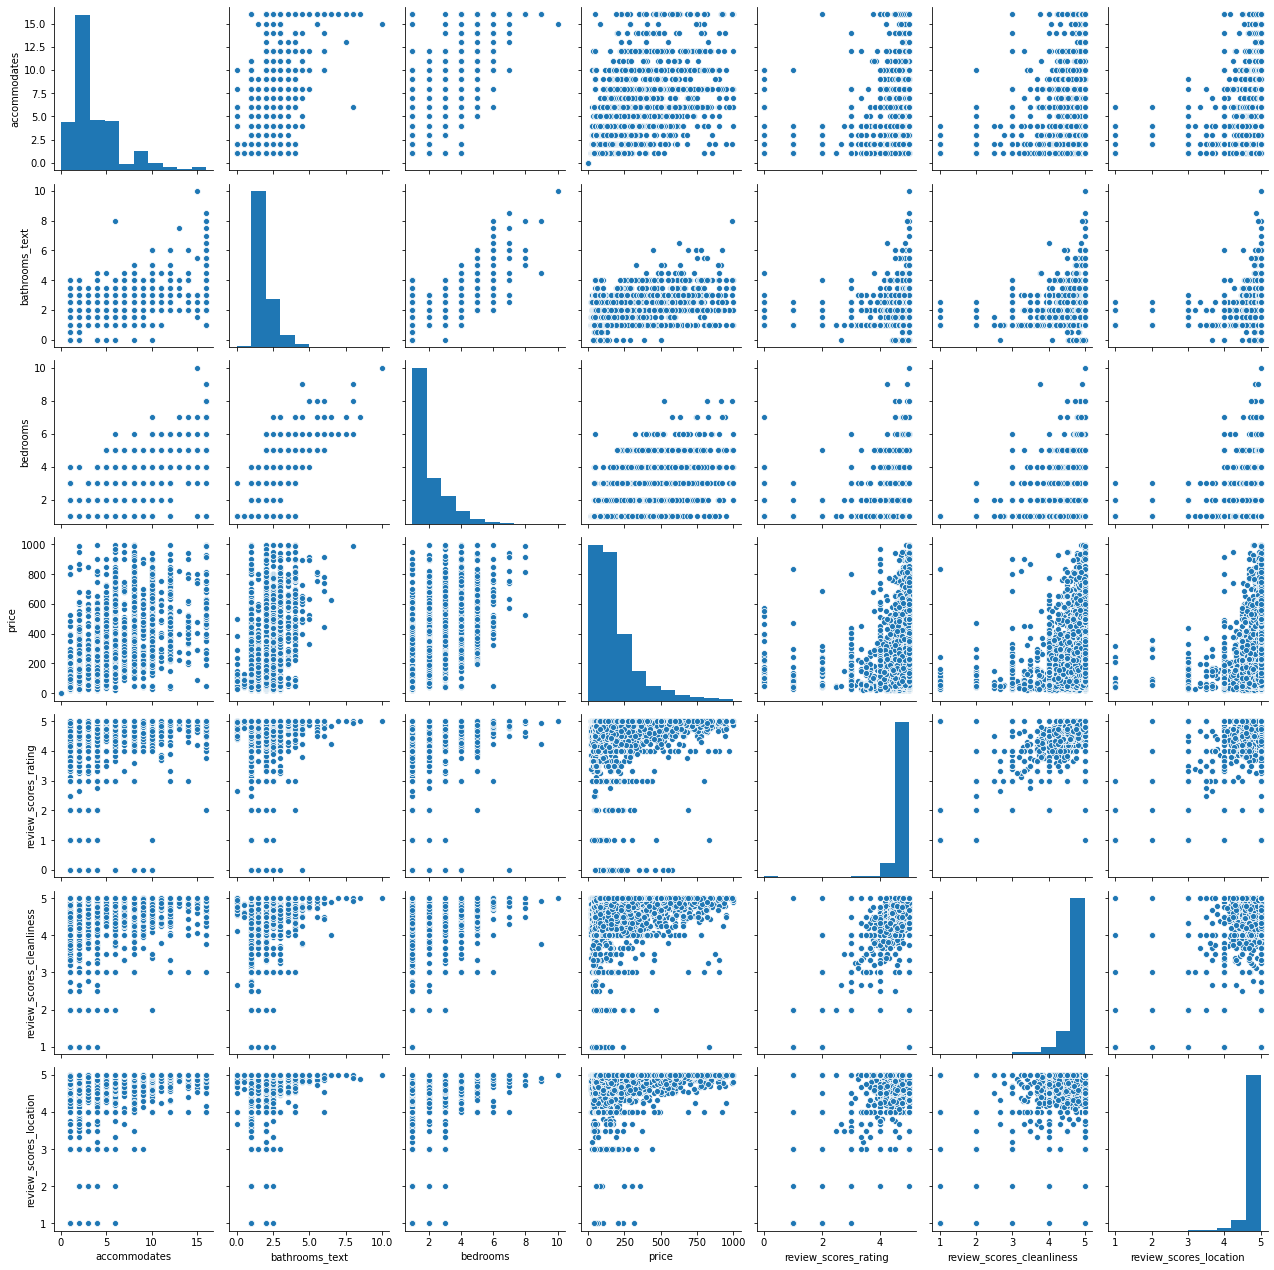

In [702]:
sns.pairplot(df)

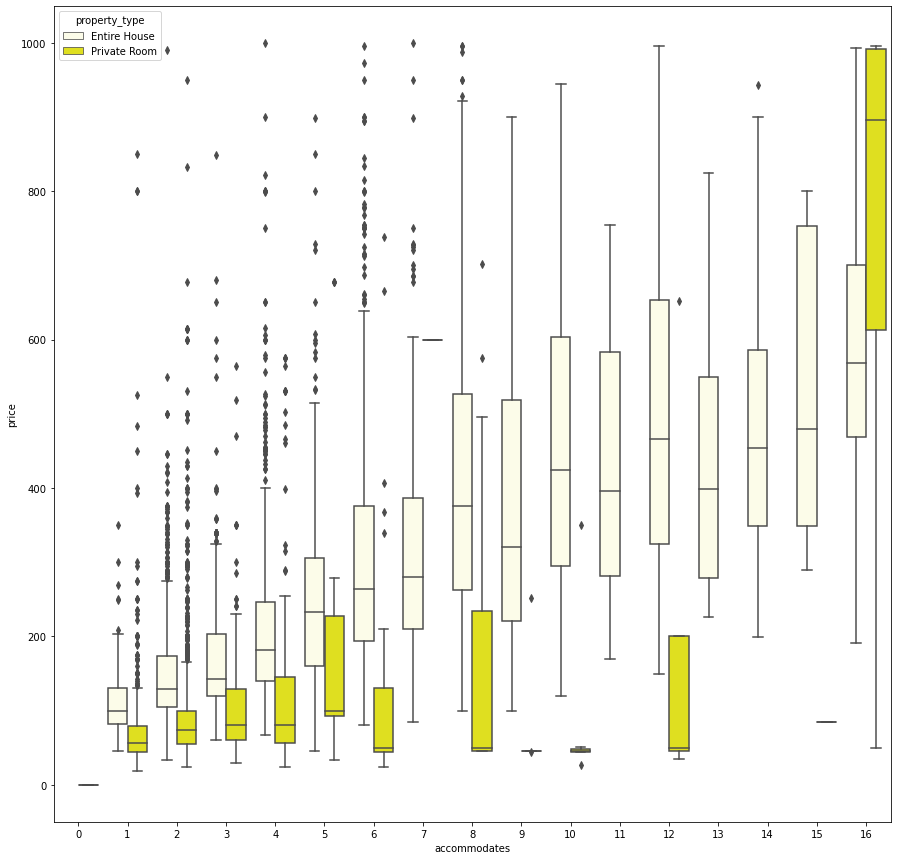

In [726]:
plt.figure(figsize=(15,15))

sns.boxplot(
    data=df,
    x='accommodates',
    y='price',
    color='yellow',
    hue='property_type')



As expected, private rooms are on average much cheapter than entire houses, yet the bottom quartile often meets the upper quartile of private rooms in price. There is one occassion however if you have a room that accommodates 5 people, where the price isn't terribly different, where the top quartile almost reaches the top quartile of the Entire House. Again, there is an obvious cut off after accomodating 8 people in a room to basically none with the only anomalies coming with hostels that were labeled at rooms.

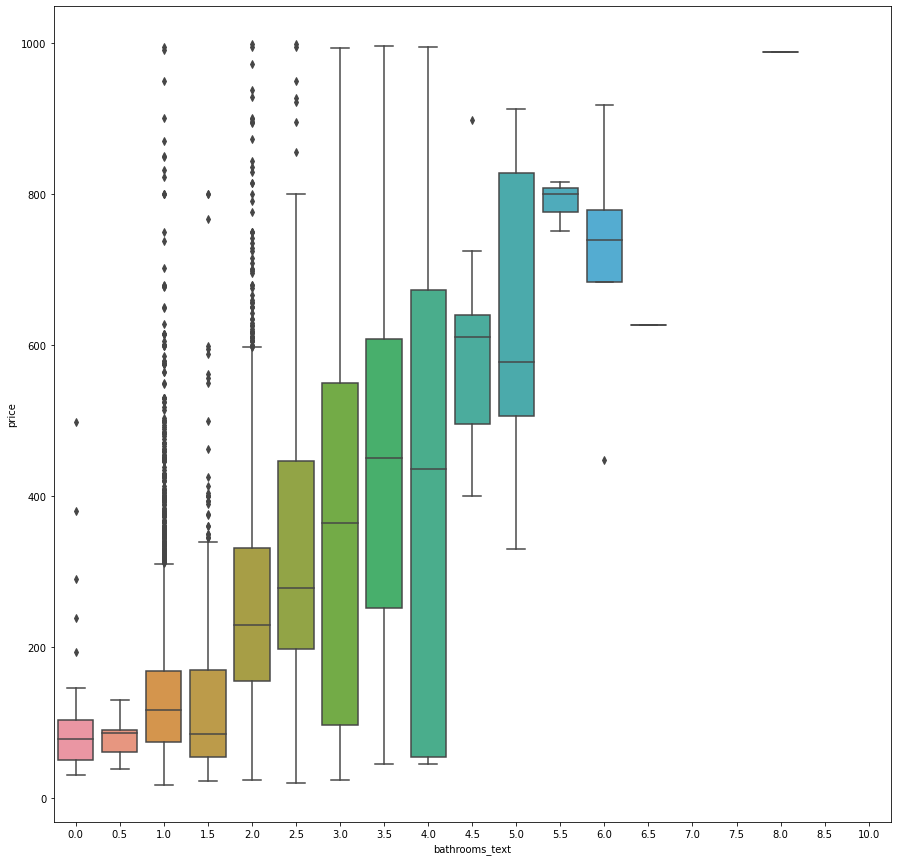

In [739]:
plt.figure(figsize=(15,15))

sns.boxplot(
    data=df,
    x='bathrooms_text',
    y='price')

Above you can see that there are large price increases starting at the second full bathroom, up to four bathrooms then settling down until 5 bathrooms with deminishing returns from there. The zero bathroom count refers to private rooms with shared bathrooms. 

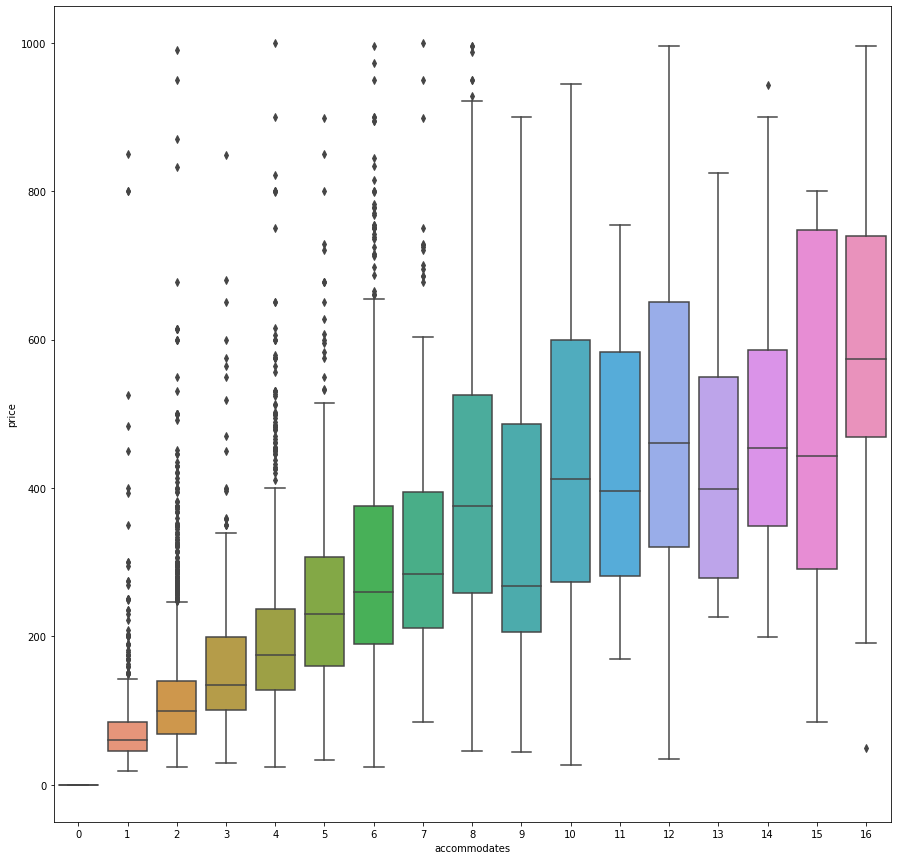

In [751]:
plt.figure(figsize=(15,15))

sns.boxplot(
    data=df,
    x='accommodates',
    y='price')

Above is similar to the graph prior to the last graph, with the difference being all property types combined. You can see that after accomodating eight, there isn't too much of a price jump per person. 

In [738]:
# plt.figure(figsize=(15,15))
# sns.boxplot(x='bathrooms_text',y='price',data=df, hue='neighbourhood')

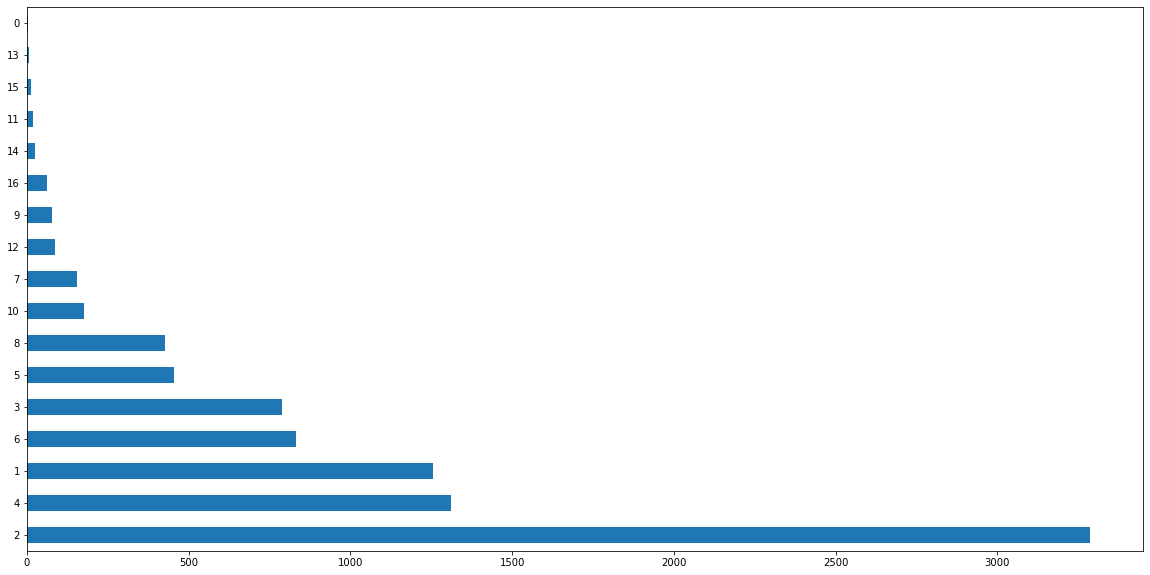

In [707]:
df['accommodates'].value_counts().plot(kind='barh', figsize=(20,10))

Above you can see that there are almost as many places that accommodates 2 as everything else combined, this is attributed to there being so many single rooms as well as houses with just a single bed. Where the price keeps going up steadily until accommodating 8, the scarcity of accommodating more helps with the higher prices. 

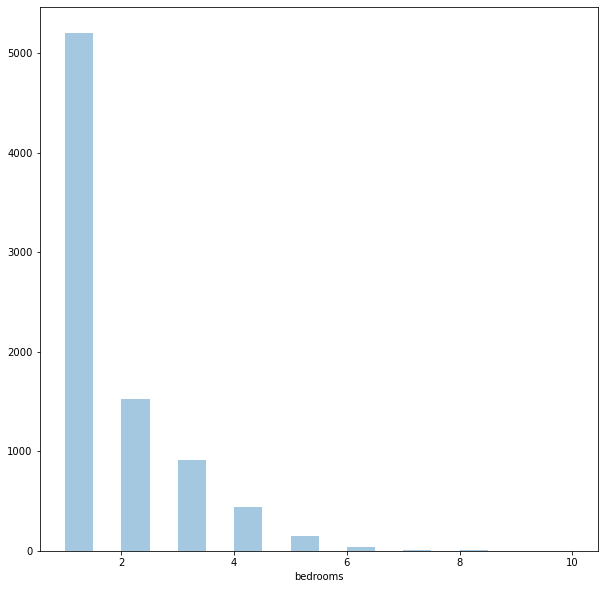

In [740]:
plt.figure(figsize=(10,10))
sns.distplot(df['bedrooms'], kde=False, bins=18)

Above shows that over 5000 of the properties have only one bedroom, and below shows that just over 3000 of the property types are single rooms, so that means that over 2000 of the single bedrooms are "entire houses". 

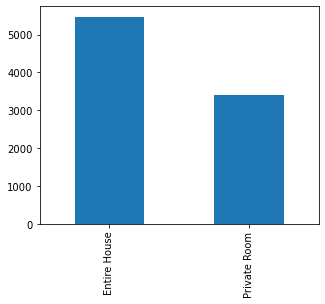

In [747]:
df['property_type'].value_counts().plot(kind='bar', figsize=(5,4))

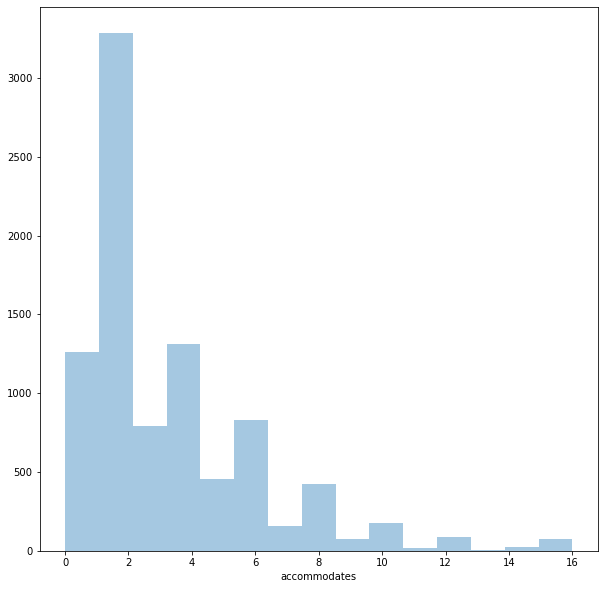

In [709]:
plt.figure(figsize=(10,10))
sns.distplot(df['accommodates'], kde=False, bins=15)

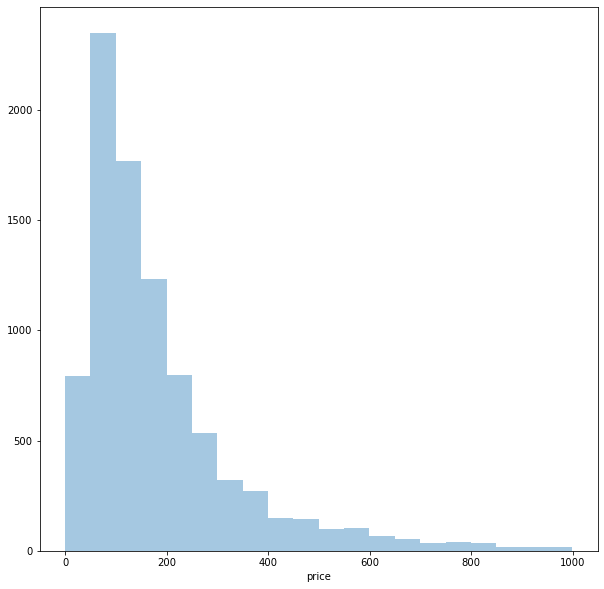

In [710]:
plt.figure(figsize=(10,10))
sns.distplot(df['price'], kde=False, bins=20)
#hue 

In [748]:
#df2 = df1.groupby('property_type')
sanmateo_df['price'].mean()

185.91627172195894

In [749]:
sanjose_df['price'].mean()

147.4621425694724

In [750]:
santacruz_df['price'].mean()

304.93925925925925

Above shows the differences of the average price in the three areas, with Santa Cruz being significantly more.

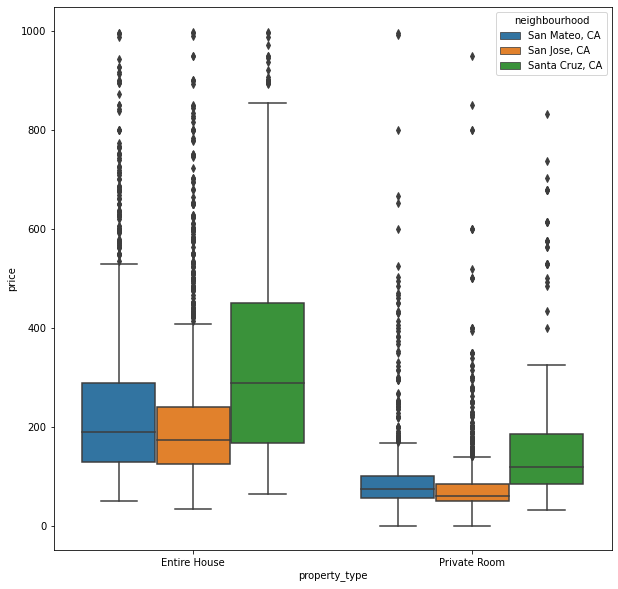

In [715]:
plt.figure(figsize=(10,10))
sns.boxplot(x='property_type',y='price',data=df, hue='neighbourhood')

In [752]:
# plt.figure(figsize=(20,20))
# sns.boxplot(x='accommodates',y='price',data=df)

In [753]:
# plt.figure(figsize=(10,10))
# sns.boxplot(x='property_type',y='price',data=df, hue='neighbourhood')

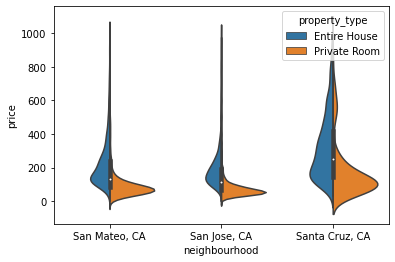

In [718]:
sns.violinplot(x='neighbourhood',y='price',data=df, hue='property_type', split=True)

In [719]:
df.head()

,neighbourhood,property_type,accommodates,bathrooms_text,bedrooms,price,review_scores_rating,review_scores_cleanliness,review_scores_location
id,,,,,,,,,
39342,"San Mateo, CA",Entire House,3,1.0,2.0,120.0,4.50,5.00,5.00
45287,"San Mateo, CA",Entire House,2,1.0,NaN,125.0,4.90,4.95,4.89
55301,"San Mateo, CA",Entire House,3,1.0,1.0,125.0,4.91,4.89,4.87
63146,"San Mateo, CA",Entire House,8,2.5,3.0,575.0,0.00,NaN,NaN
72211,"San Mateo, CA",Entire House,8,1.0,3.0,408.0,4.91,4.78,4.85


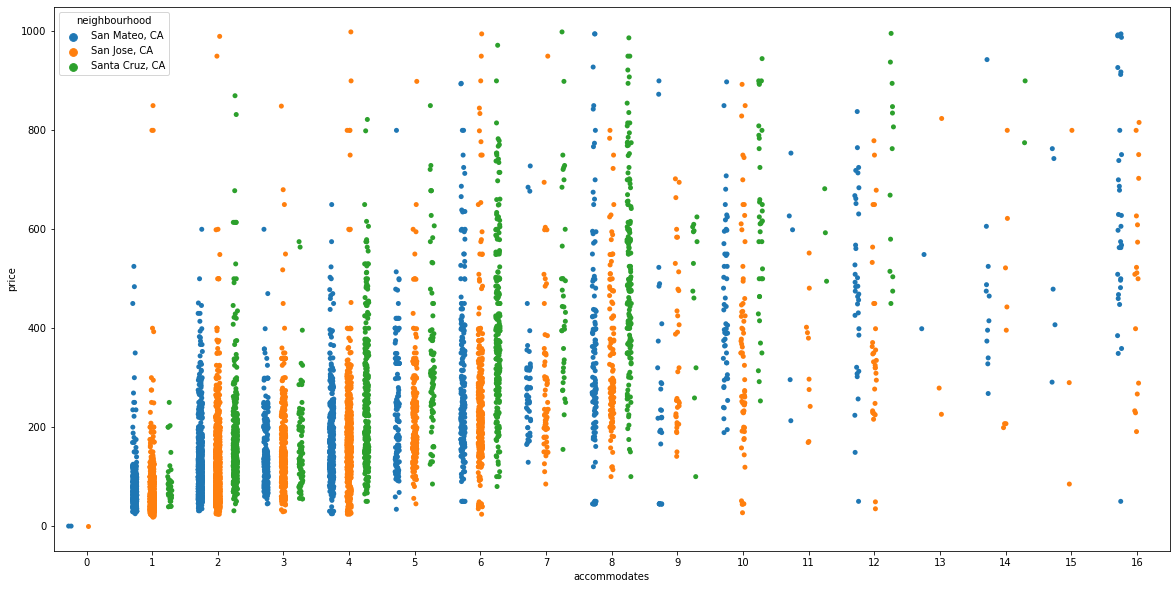

In [720]:
plt.figure(figsize=(20,10))
sns.stripplot(x='accommodates',y='price',data=df, jitter=True, hue='neighbourhood', dodge=True)

In [721]:
df_corr = df.corr()
df_corr

,accommodates,bathrooms_text,bedrooms,price,review_scores_rating,review_scores_cleanliness,review_scores_location
accommodates,1.000000,0.655075,0.865982,0.670303,0.017817,0.003820,0.032062
bathrooms_text,0.655075,1.000000,0.723138,0.513470,0.014341,-0.035557,0.018735
bedrooms,0.865982,0.723138,1.000000,0.693649,0.014704,0.017585,0.039376
price,0.670303,0.513470,0.693649,1.000000,0.043694,0.070152,0.094966
review_scores_rating,0.017817,0.014341,0.014704,0.043694,1.000000,0.770182,0.558665
review_scores_cleanliness,0.003820,-0.035557,0.017585,0.070152,0.770182,1.000000,0.445257
review_scores_location,0.032062,0.018735,0.039376,0.094966,0.558665,0.445257,1.000000


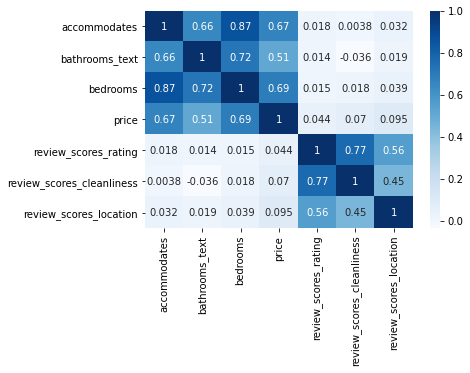

In [722]:
sns.heatmap(df_corr, annot=True, cmap='Blues')

In [755]:
#

Overall, there are mostly properties that accommodate two, with an average price between $100 and $200, depending on location. Cleanliness seems to be the least corralated factor in pricing, where bedrooms and bathrooms, alongside location are the highest factors in pricing, which was expected. Some unexpected factors was the dropoff in price after accommodating 8, as well as Santa Cruz being so expensive!   